In [1]:
import sys

# Add path for python to look into for modules installed using pip

sys.path.append('/usr/local/lib/python3.7/site-packages/')

import quandl
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import requests
import json
import datetime
import random

np.set_printoptions(threshold=sys.maxsize)
quandl.ApiConfig.api_key = "n2tNssPxEFC9-Ad79fo-" # keep this private
pd.set_option('display.max_columns', None)

In [2]:
# Start/end dates

start = '2010-10-15'
end = '2018-10-15'

oos_start = end
oos_end = '2019-10-15'

In [3]:
# Read available Quandl ticker symbols

tickers = pd.read_csv('data/ticker_list.csv', sep=',')

In [4]:
def ema(asset, short_window, long_window, start_date=start, end_date=end):
    
    # Get Quandl data
    
    if 'EOD/'+asset.replace('.', '_') in list(tickers['Quandl_Code']):
        
        try:
            quandl_data = quandl.get('EOD/'+asset.replace('.', '_'), start_date=start_date, end_date=end_date)
        except:
            return 0
        
        # Get stocks with at least X Quandl entries
        
        if len(quandl_data) >= 500:
            quandl_data['log_ret'] = np.log(quandl_data.Adj_Close) - np.log(quandl_data.Adj_Close.shift(1))
            quandl_data['Date'] = pd.to_datetime(quandl_data.index, format='%Y-%m-%d')
            # Short window
            quandl_data['ema_20'] = quandl_data['Adj_Close'].ewm(span = short_window, adjust = False).mean()
            # Long window
            quandl_data['ema_100'] = quandl_data['Adj_Close'].ewm(span = long_window, adjust = False).mean()
            return quandl_data
        else:
            return 0
    else:
        return 0

In [5]:
stock = 'AAPL'

ema_data = ema(asset=stock, short_window=20, long_window=100)

ema_data.head(20)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,log_ret,Date,ema_20,ema_100
Date,,,,,,,,,,,,,,,,
2010-10-15,307.44,315.0000,304.91,314.740,32935500.0,0.0,1.0,38.324042,39.266436,38.008664,39.234026,230548500.0,NaN,2010-10-15,39.234026,39.234026
2010-10-18,318.47,319.0000,314.29,318.000,39036100.0,0.0,1.0,39.698990,39.765058,39.177931,39.640402,273252700.0,0.010304,2010-10-18,39.272728,39.242073
2010-10-19,303.40,313.7700,300.02,309.490,44028000.0,0.0,1.0,37.820434,39.113110,37.399099,38.579585,308196000.0,-0.027126,2010-10-19,39.206715,39.228954
2010-10-20,309.00,314.2500,306.87,310.530,25772300.0,0.0,1.0,38.518504,39.172945,38.252988,38.709227,180406100.0,0.003355,2010-10-20,39.159335,39.218663
2010-10-21,312.36,314.7400,306.80,309.520,19695000.0,0.0,1.0,38.937346,39.234026,38.244262,38.583325,137865000.0,-0.003258,2010-10-21,39.104477,39.206082
2010-10-22,309.07,310.0400,306.30,307.470,13313500.0,0.0,1.0,38.527230,38.648146,38.181935,38.327781,93194500.0,-0.006645,2010-10-22,39.030506,39.188690
2010-10-25,309.09,311.6000,308.44,308.840,14016500.0,0.0,1.0,38.529723,38.842608,38.448697,38.498559,98115500.0,0.004446,2010-10-25,38.979844,39.175024
2010-10-26,306.87,309.7400,305.65,308.050,14033200.0,0.0,1.0,38.252988,38.610749,38.100909,38.400082,98232400.0,-0.002561,2010-10-26,38.924629,39.159678
2010-10-27,307.65,309.9000,305.60,307.830,14250100.0,0.0,1.0,38.350219,38.630694,38.094676,38.372657,99750700.0,-0.000714,2010-10-27,38.872060,39.144094


/Users/maosa/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


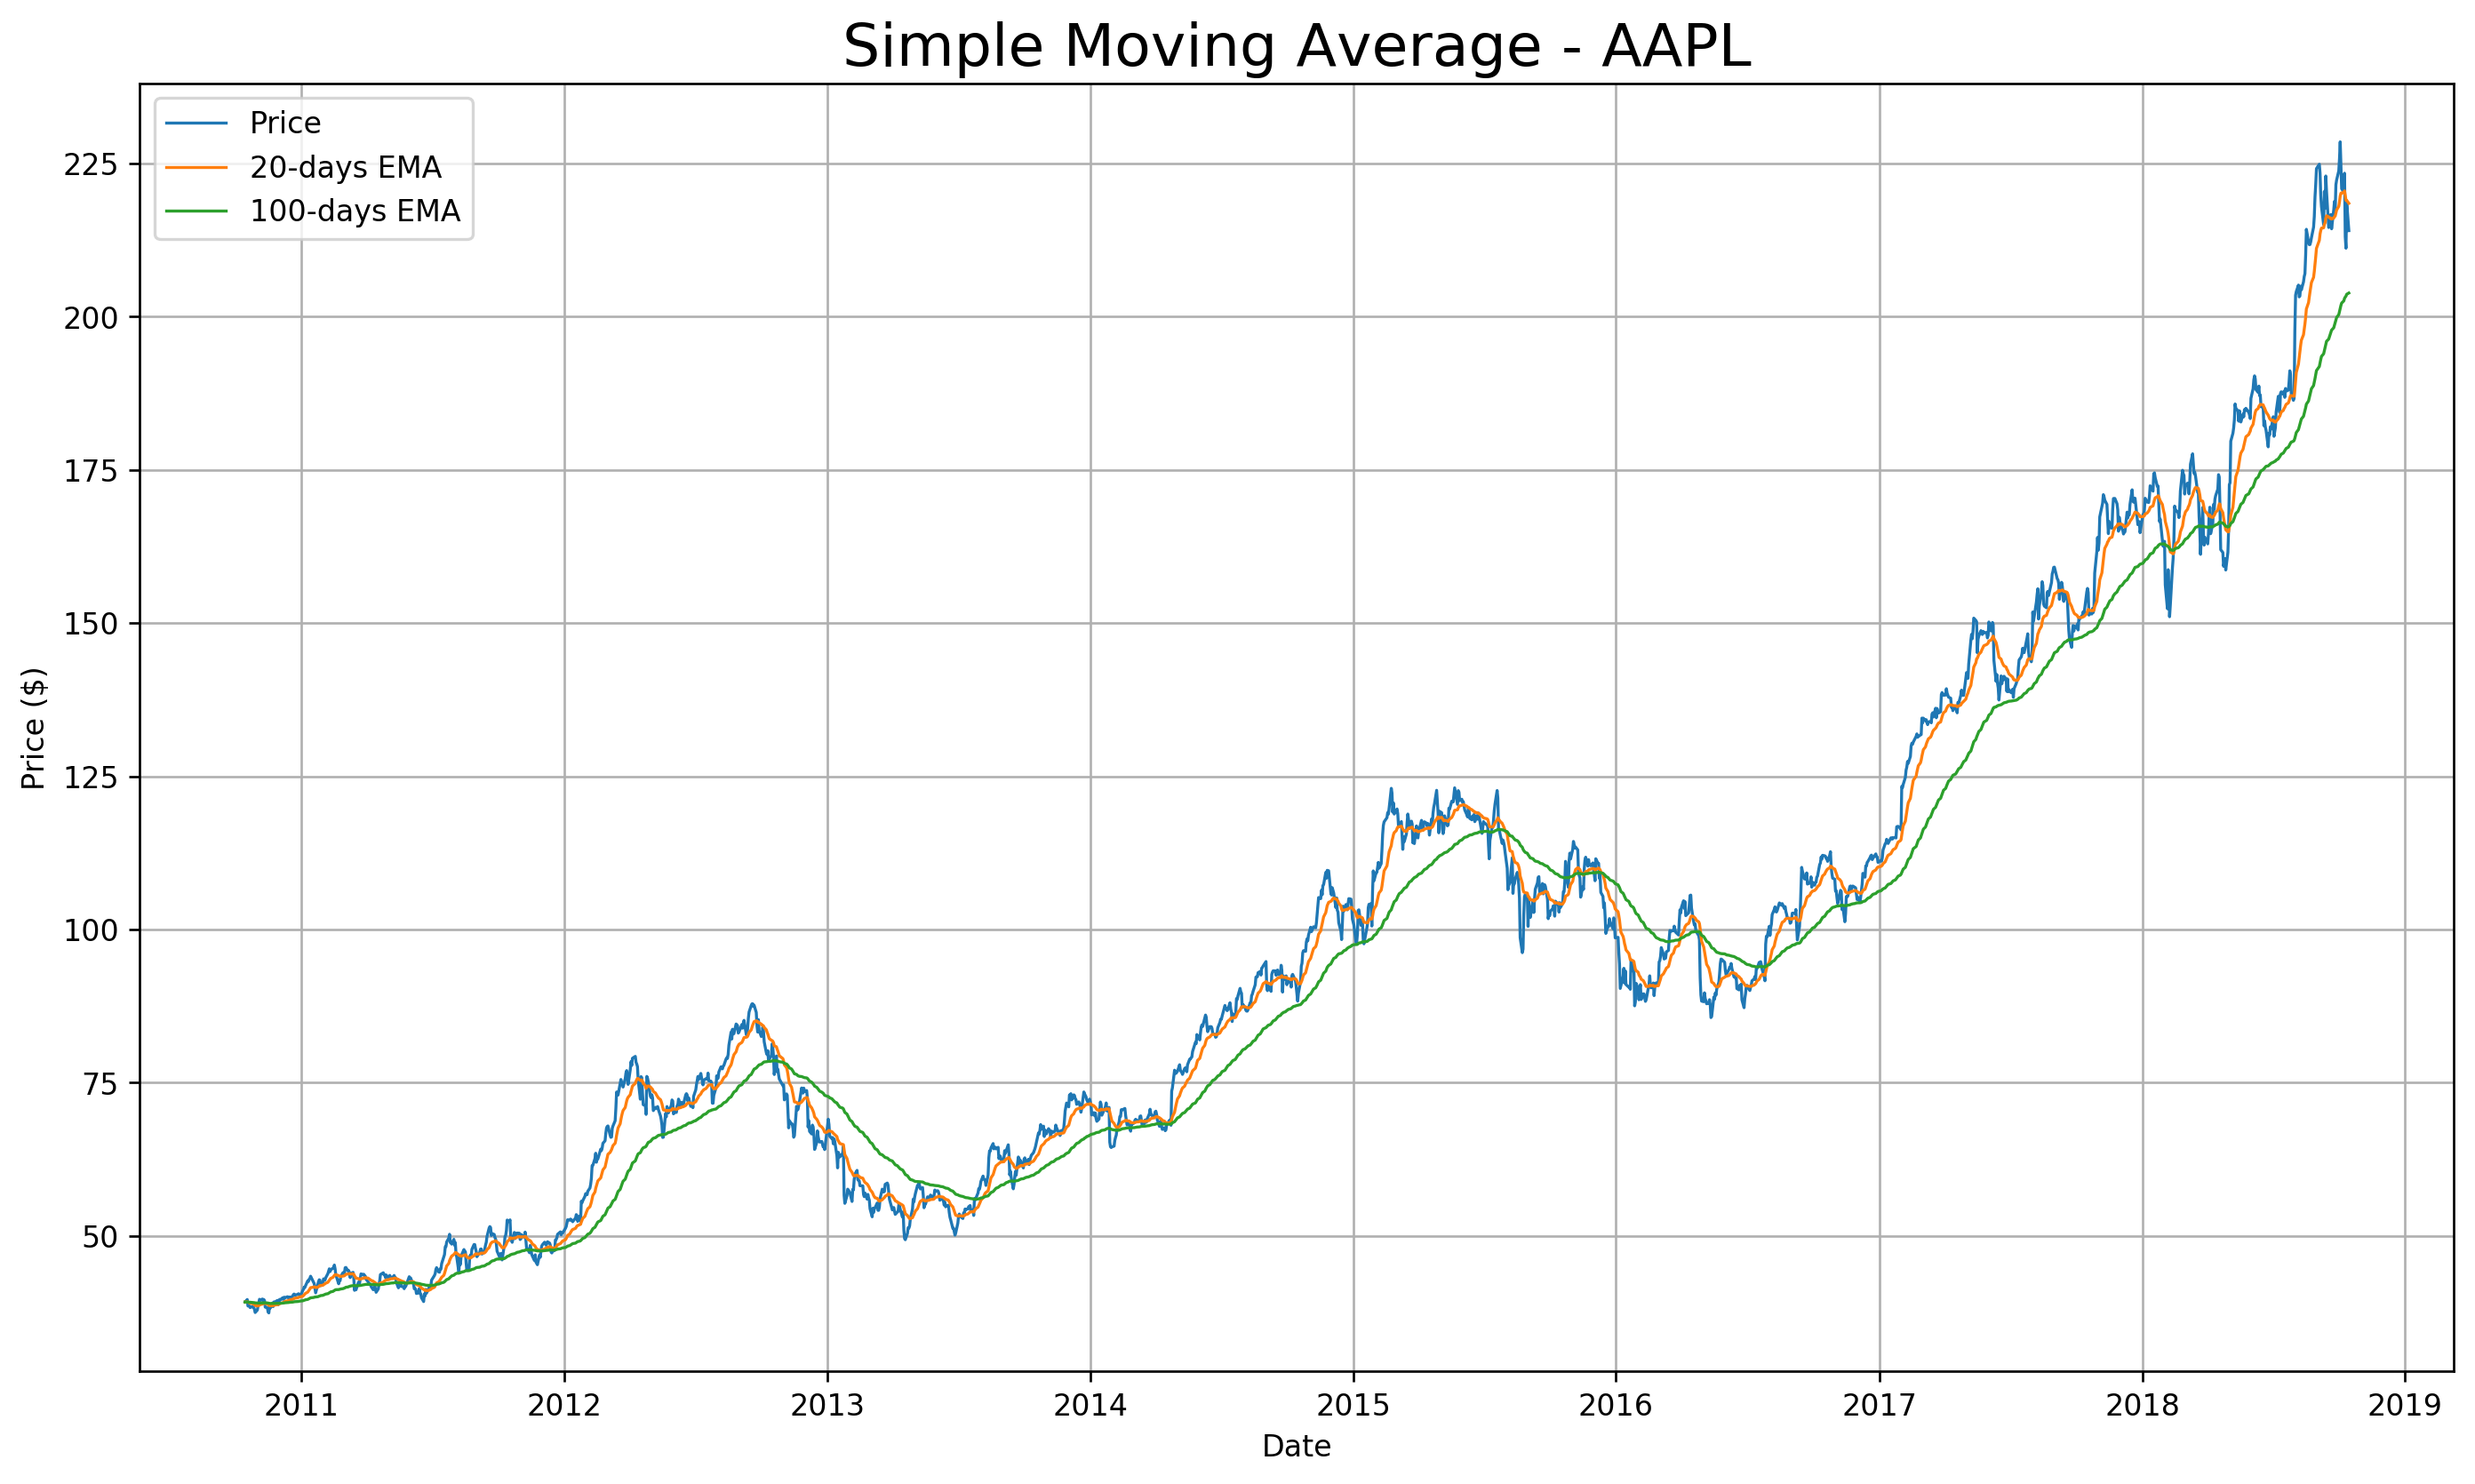

In [6]:
# Set global matplotlib options

plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.dpi'] = 240
plt.rcParams['axes.titlesize'] = 20
# plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['lines.linewidth'] = 1

plt.plot(ema_data.index, ema_data['Adj_Close'], label = 'Price')
plt.plot(ema_data.index, ema_data['ema_20'], label = '20-days EMA')
plt.plot(ema_data.index, ema_data['ema_100'], label = '100-days EMA')

plt.legend(loc = 'best')
plt.title('Simple Moving Average - ' + stock)
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid()
plt.show()

In [7]:
#Create a function to do this for each company in a loop

company = ['MSFT', 'AAPL', 'JPM']

def Get_ema_analysis(company):
    
    stock = company
    
    for i in stock:
        
        q_data = ema(i, short_window=20, long_window=100, start_date=start, end_date=end)
        #print(q_data)
        #print("AA")
    
        plt.plot(q_data.index, q_data['Adj_Close'], label = 'Price ' + str(i))
        plt.plot(q_data.index, q_data['ema_20'], label = '20-days EMA ' + str(i))
        plt.plot(q_data.index, q_data['ema_100'], label = '100-days EMA ' + str(i))

        plt.title('Simple Moving Average - ' + str(stock))
        plt.xlabel('Date')
        plt.ylabel('Price ($)')
    
    plt.grid()
    plt.legend(loc = 'best', fontsize = 'large')

        

    

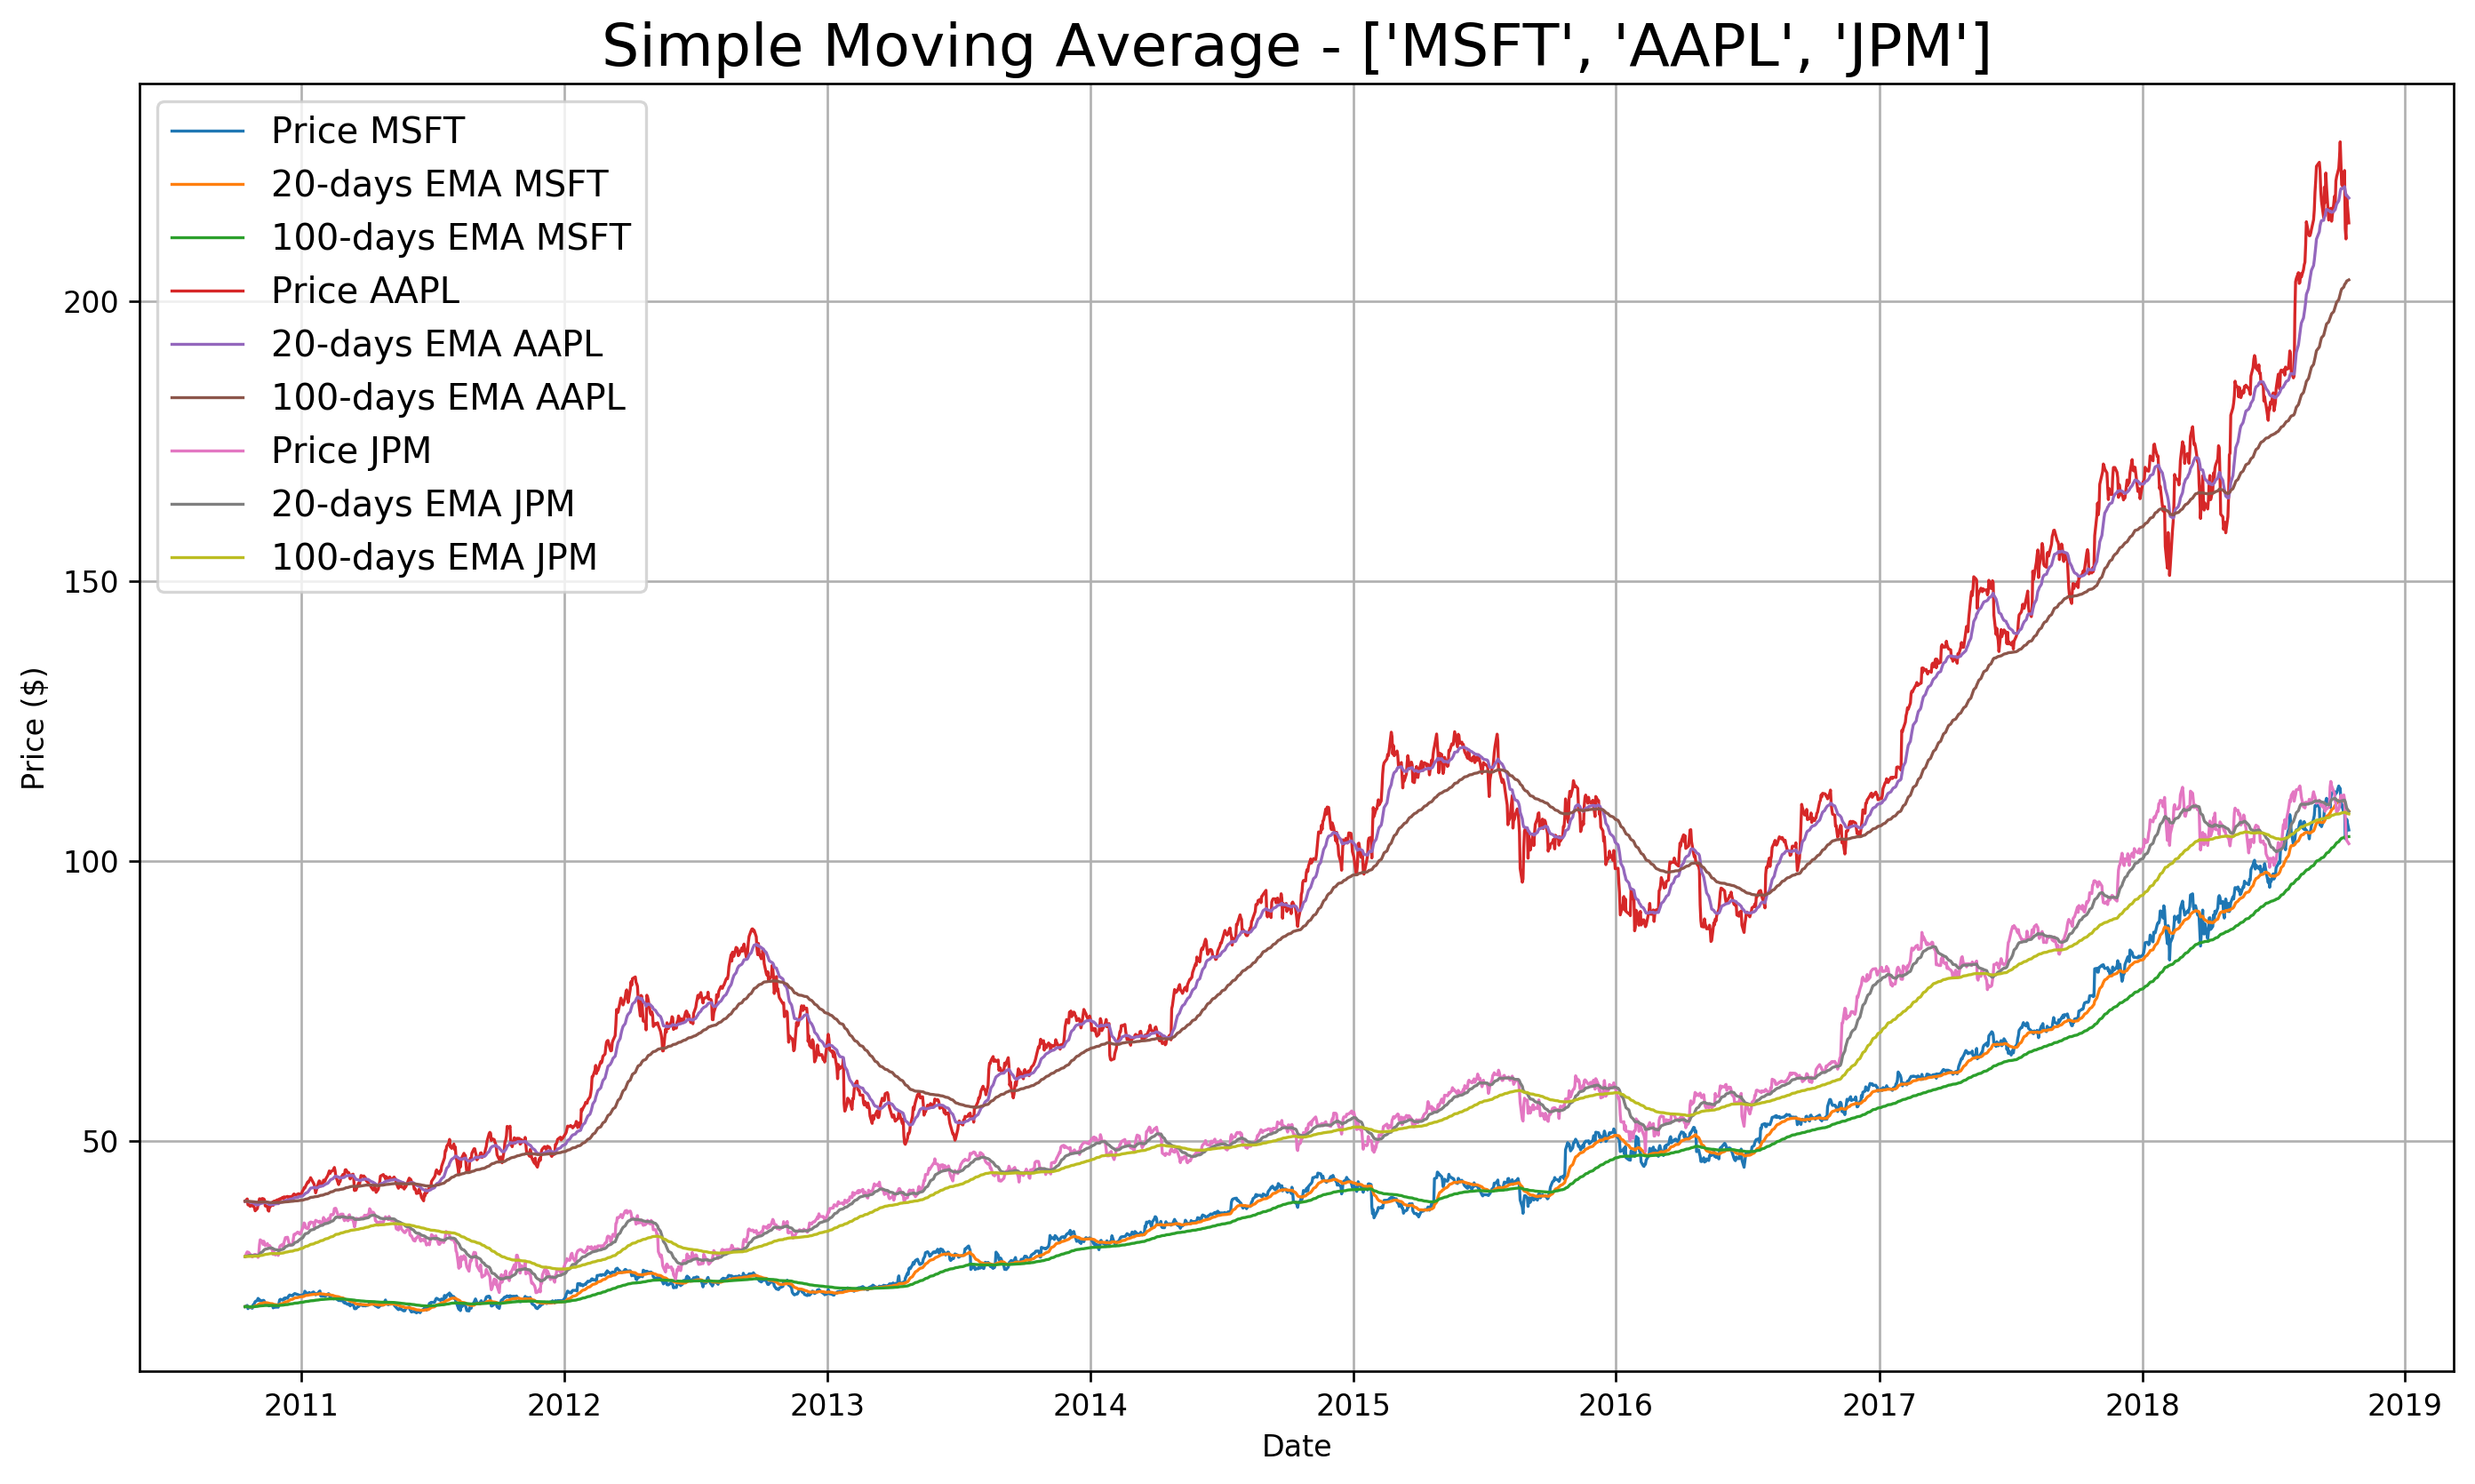

In [8]:
Get_ema_analysis(company)